# HD 219828 
### Possible Brown Dwarf Benchmarking:
    
Aim is to get be able to obtain a spectra of the companion around HD 219828.

If this is possible then with GAIA data we will be able to benchmark this system.

First to be able to do this we need to detemine the contrast for the object (Planet/ Brown Dwarf) and the star.

# Magntiude of the Star

Magnitude of the star given in apparnet magnitude.

To convert from apparent magnitude to absolute magnitude you calculate the distince modulii (m -M) = 5 *(log10(d) - 1).


In [2]:
import math

Vstar_apparent = 8.04
print("Apparent magnitude of Star = ", round(Vstar_apparent, 3))
Paralax = 12.83  # mas
d = round((1 / Paralax) * 1000 , 1)   # paralax inin arcsec
print("Distance = {0}. Calculated from a Paralax of {1}".format(d, Paralax))

#d = 76 # pc (nuno), 81pc discovery paper/wikipedia
#d2 = 81 
Age = 5 # Gyr
 
distance_modulii = round(5 * (math.log10(d) - 1), 4) 

print("Distance Modulii for {0} pc = {1}".format(d, round(distance_modulii,3)))

Mag_star = Vstar_apparent - distance_modulii

print("Absolute magnitude of Star [M = m - d]= ", round(Mag_star, 3))


Apparent magnitude of Star =  8.04
Distance = 77.9. Calculated from a Paralax of 12.83
Distance Modulii for 77.9 pc = 4.458
Absolute magnitude of Star [M = m - d]=  3.582


## Brown Dwarf Magnitudes:

Using evolutionary models for cool brown dwarfs from Baraffe 2003, Appendix Table 4: 5 Gyr 

Working out the contrast of different mass Brown Dwarfs:
We wish to calculate the contrasts for three different Brown Dwarf masses
15, 50 and 80 Mjupiter. To find the rows with the closest mass in the table we need to convert these values to solar masses.

In [3]:
# Convert between solar and jupiter masses to read off table
SolMassinMj = 1047.56  # MJjupiter
BD_mass = [15, 50, 80]  # Mjupiter
print("BD masses = {} Mjupiter".format(BD_mass) )
print("BD masses = {} Msolar".format([round(M / SolMassinMj, 3) for M in BD_mass]))

tableMasses = [0.0150, 0.05, 0.0750]  #Msolar
BD_Teff = [399, 931, 2006] # Teff K

print("Mass of closest rows from the table = {} Mjupiter".format([round(tble*SolMassinMj, 3) for tble in tableMasses]))
print("Teff of these BDs from the table = {} K".format(BD_Teff))

BD masses = [15, 50, 80] Mjupiter
BD masses = [0.014, 0.048, 0.076] Msolar
Mass of closest rows from the table = [15.713, 52.378, 78.567] Mjupiter
Teff of these BDs from the table = [399, 931, 2006] K


The Table has magnitudes for in many different passbands (VRIJHKL'M), along with some other parameters ( Teff, log Luminosity ratio, radius ratio, log g). The models only go up to the M band (4.7 μm), so will try and use that that for the calcualtions. Note VISIR operates in the N and Q bands centered around 10 μm and 22 μm respectivly.
Only the bands J-M are copied into here.

In [4]:
BDBands = ["J", "H", "K", "L'", "M"]
BDBands_centers = [1.220, 1.630, 2.190, 3.450, 4.750]  # μm
BDMags_15 = [20.85, 21.14, 26.01, 16.96, 14.97]
App_BDMags_15 = [round(bdmag + distance_modulii, 3) for bdmag in BDMags_15]
BDMags_52 = [15.94, 16.05, 16.38, 13.38, 12.63]
App_BDMags_52 = [round(bdmag + distance_modulii, 3) for bdmag in BDMags_52]
BDMags_80 = [12.20, 11.92, 11.78, 10.54, 11.06]
App_BDMags_80 = [round(bdmag + distance_modulii, 3) for bdmag in BDMags_80]

#Magnitude in the M band
print("BD masses = {} Mjupiter".format(BD_mass) )
print("Absolute BD Magnitudes in Mband = {}".format([BDMags_15[-1], BDMags_52[-1] , BDMags_80[-1]]))
print("Apparent BD Magnitudes in Mband = {}".format([App_BDMags_15[-1], App_BDMags_52[-1] , App_BDMags_80[-1]]))



BD masses = [15, 50, 80] Mjupiter
Absolute BD Magnitudes in Mband = [14.97, 12.63, 11.06]
Apparent BD Magnitudes in Mband = [19.428, 17.088, 15.518]


# Conversion between Bands:
Need to be able to convert between magnitudes in difference bands. For this I used the solar colours found in Casagrande et. al. 2012 "The Infrared Colours of the Sun". This gives the Solar colours from 2MASS and WISE surveys which are the passbands we want. We can use this as the star HD219828 has a temperature of 5891 K, which is similato the Sun.

From what I understance the solor colours are the difference in magnitude between two bands. e.g. (V-k)=1.560 is a 1.560 magnitude difference between the V band and K band.

In [12]:
# Solar Colour values
print("HD219828 with Solar Colour Conversions")
print("Using the logic if (V-J) = 1.198  then J = V - 1.198 ")
Bands =  ['J', 'H', 'ks', 'W1', 'W2', 'W3', 'W4']
Bands_space =  [' J', ' H', ' ks', ' W1', ' W2', ' W3', ' W4']
Band_centers =  [1.25, 1.65, 2.17, 3.4, 4.6, 12, 22] # μm
V_J = 1.198 
V_H = 1.484
V_Ks = 1.560   # 2.17 μm
V_W1 = 1.608   # 3.4 μm
V_W2 = 1.563   # 4.6 μm    # M = 4.7 μm
V_W3 = 1.552   # 12 μm     # Nband = 8-14 μm
V_W4 = 1.604   # 22 μm     # Qband = 21 μm

AbsBandMags = [Mag_star-V_J, Mag_star-V_H, Mag_star-V_Ks, Mag_star-V_W1, Mag_star-V_W2, Mag_star-V_W3, Mag_star-V_W4]
AppBandMags = [mag + distance_modulii for mag in AbsBandMags]
print("Star V mag = ", round(Mag_star, 3))
print("Bands = \t\t\t", Bands_space)
print("Colours = \t\t\t",  [V_J, V_H, V_Ks, V_W1, V_W2, V_W3, V_W4])
print("Absolute Band Magnitudes = \t", [round(a,3) for a in AbsBandMags])
print("Star Apparent Band Magnitude = \t", [round(a,3) for a in AppBandMags])


HD219828 with Solar Colour Conversions
Using the logic if (V-J) = 1.198  then J = V - 1.198 
Star V mag =  3.582
Bands = 			 [' J', ' H', ' ks', ' W1', ' W2', ' W3', ' W4']
Colours = 			 [1.198, 1.484, 1.56, 1.608, 1.563, 1.552, 1.604]
Absolute Band Magnitudes = 	 [2.384, 2.098, 2.022, 1.974, 2.019, 2.03, 1.978]
Star Apparent Band Magnitude = 	 [6.842, 6.556, 6.48, 6.432, 6.477, 6.488, 6.436]


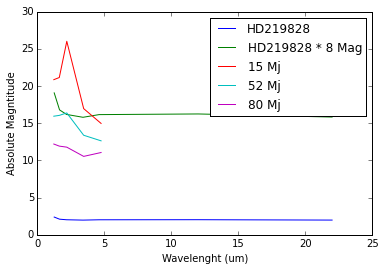

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(Band_centers , AbsBandMags, label = "HD219828")
plt.plot(Band_centers , [8*a for a in AbsBandMags], label = "HD219828 * 8 Mag")
#plt.plot(Band_centers , [a + 8 for a in AbsBandMags], label = "HD219828 + 8 Mag")
plt.plot(BDBands_centers, BDMags_15, label = "15 Mj")
plt.plot(BDBands_centers, BDMags_52, label = "52 Mj")
plt.plot(BDBands_centers, BDMags_80, label = "80 Mj")
plt.ylabel("Absolute Magntitude")
plt.xlabel("Wavelenght (um)")
plt.legend()

plt.show(block=False)


# Magnitude Differences:
Now that we have the magnitudes for the star in the different band we can calculate the magnitude differences between the brown dwarf and the star can get a brightness difference ratio.

In [9]:
#Differences in magnitude and Relative Brightness in the M band
f = 2.512

BD_M_Mags = [BDMags_15[4], BDMags_52[4], BDMags_80[4]]
Mag_diffs = [mag - AbsBandMags[4] for mag in BD_M_Mags]
FluxRatios = [f** magdiff for magdiff in Mag_diffs]

print("Abs Magnitude Difference in M/W2 Band (M_BD - M_*) and Flux ratio")
print("~15 MJ Brown Dwarf = {}, \t F/F* ~= {} \t~ {}".format(round(Mag_diffs[0], 3), round(FluxRatios[0], 0), round(1/FluxRatios[0], 6)))
print("~50 MJ Brown Dwarf = {}, \t F/F* ~= {} \t~ {}".format(round(Mag_diffs[1], 3), round(FluxRatios[1], 0), round(1/FluxRatios[1], 6)))
print("~80 MJ Brown Dwarf = {}, \t F/F* ~= {} \t~ {}".format(round(Mag_diffs[2], 3), round(FluxRatios[2], 0), round(1/FluxRatios[2], 6)))



Abs Magnitude Difference in M/W2 Band (M_BD - M_*) and Flux ratio
~15 MJ Brown Dwarf = 12.951, 	 F/F* ~= 151542.0 	~ 7e-06
~50 MJ Brown Dwarf = 10.611, 	 F/F* ~= 17559.0 	~ 5.7e-05
~80 MJ Brown Dwarf = 9.041, 	 F/F* ~= 4135.0 	~ 0.000242


Because this is in the M band and not the N or Q bands it is hard to say if this is a good result.


#### Delta H J K values


In [19]:
print("Bands = {} ".format(BDBands[:3]))
print("Apparent Star Mag = {}".format([round(AppBandMags[j], 3) for j in range(3)]))

print("Apparent 80 MJ Mag = {}".format(App_BDMags_80[:3]))
Deltas_80 = [round(App_BDMags_80[i] - AppBandMags[i],3) for i in range (3)] 
print("80 MJ Deltas = {} ".format(Deltas_80))

print("Apparent 52 MJ Mag = {}".format(App_BDMags_52[:3]))
Deltas_52 = [round(App_BDMags_52[i] - AppBandMags[i],3) for i in range (3)] 
print("52 MJ Deltas = {} ".format(Deltas_52))

print("Apparent 15 MJ Mag = {}".format(App_BDMags_15[:3]))
Deltas_15 = [round(App_BDMags_15[i] - AppBandMags[i],3) for i in range (3)] 
print("15 MJ Deltas = {} ".format(Deltas_15))

Bands = ['J', 'H', 'K'] 
Apparent Star Mag = [6.842, 6.556, 6.48]
Apparent 80 MJ Mag = [16.658, 16.378, 16.238]
80 MJ Deltas = [9.816, 9.822, 9.758] 
Apparent 52 MJ Mag = [20.398, 20.508, 20.838]
52 MJ Deltas = [13.556, 13.952, 14.358] 
Apparent 15 MJ Mag = [25.308, 25.598, 30.468]
15 MJ Deltas = [18.466, 19.042, 23.988] 


## Signal to Noise:
The required Signal to Noise has to be greater then the inverse of the flux ratio (10**-x). At this limit then the signal of the planet will be the same level as the noise. 
This is the values that I already calcualted so Minimum singal to noise is 4000.

In [17]:
print("S/N Calcualtions")
print("Singal to Noise Values needed {}".format([round(ratio, 0) for ratio in FluxRatios]))

S/N Calcualtions
Singal to Noise Values needed [151542.0, 17559.0, 4135.0]


## Black Body of Brown Dwarfs
To give an indication about the N and Q band fluxes of the Brown Dwarfs
Wiens displacement law can be used to find where the intensity per unit wavelength of the radiation produced by a black body is at a maximum

In [18]:
b = 2.8977721*10**-3   # K m

wlpeaks = [round( (b*10**6 )/Ti ,4 ) for Ti in BD_Teff]

print("Bands = \t\t\t", Bands)
print("Band centers = \t\t\t {} μm".format(Band_centers))
print("Bands = \t\t\t", BDBands)
print("Band centers = \t\t\t {} μm \n".format(BDBands_centers))


print("Brown Dwarf masses = \t\t {} Mjupiter".format(BD_mass))
print("Brown Dwarf Temperatures =\t {} K".format(BD_Teff))
print("Wavelength of Peak intensity = \t {} μm".format(wlpeaks))

Bands = 			 ['J', 'H', 'ks', 'W1', 'W2', 'W3', 'W4']
Band centers = 			 [1.25, 1.65, 2.17, 3.4, 4.6, 12, 22] μm
Bands = 			 ['J', 'H', 'K', "L'", 'M']
Band centers = 			 [1.22, 1.63, 2.19, 3.45, 4.75] μm 

Brown Dwarf masses = 		 [15, 50, 80] Mjupiter
Brown Dwarf Temperatures =	 [399, 931, 2006] K
Wavelength of Peak intensity = 	 [7.2626, 3.1125, 1.4446] μm


From just Wiens law we can see that a 80 MJ BD will have peak intesnity in the H band, a 50 MJ BD will have peak intensity around the L band, and a 15 MJ BD a peak intensity just before the start of the N band (between 8 to 13μm according to VISIR page). So from this I infer that the magnitude of a 15 MJ BD will be lower in the N band but not for 50 and 80 Mj BDs


# Mangnitude Conversions

Assuming that the M(ab) magnitude is directly convertable from the Magnitudes I have...

m(AB) = -5/2 log10 (f_v/ZP)

ZP = 170 +- 8 Jy for zero point in the M band  from Campins, Reike, & Lebovsky (1985) "Absolute calibration oof photometery at 1 thought 5 μm"

ZP = 35.03±0.30  Jy  for  the  monochromatic  flux  density  of  “Vega”  at 10.6μm RIEKE ET AL. 2008 "ABSOLUTE PHYSICAL CALIBRATION IN THE INFRARED"


In [37]:
import math
f_nu = lambda m, ZP : 10 ** (-2.0*m/5.0) * ZP
m_ab = lambda f_v, ZP: -5.0/2.0 * math.log10(f_v/ZP)
#Assuming that the band magnitudes can go into this forular using the band zero points then 
V_ZP = 3631  # Jy
M_ZP = 170   # Jy
N_ZP = 35.03 # Jy

f_V_star = f_nu(8.04 , V_ZP)
f_M_star = f_nu(AppBandMags[4] , M_ZP)
f_N_star = f_nu(AppBandMags[5] , N_ZP)


Apparent_BD_mags_Mband = [App_BDMags_15[-1], App_BDMags_52[-1] , App_BDMags_80[-1]]
F_M_BD = [round(f_nu(mag , M_ZP)*1000, 4) for mag in Apparent_BD_mags_Mband]

print("Stellar host Spectral flux density in the V band = {0} mJy  M band = {1} mJy  and in the N band = {2} mJy".format(round(f_V_star*1000,1), round(f_M_star*1000,1), round(f_N_star*1000,1)))
print("Brown Dwarf Spectral density in M band",  F_M_BD, "mJy")
print("Assumptions made:\n1. The band magnitudes calculated from COND model and distance modulii can be used in the m_ab monochromatic formula.\n2. The apparent magnitude is the one used for the spectral flux density (as it is what we actually see).\n3. Zero Point value for M band is 170 Jy, from  Campins, Reike, & Lebovsky (1985).")


Stellar host Spectral flux density in the V band = 2208.1 mJy  M band = 436.2 mJy  and in the N band = 89.0 mJy
Brown Dwarf Spectral density in M band [0.0029, 0.0248, 0.1055] mJy
Assumptions made:
1. The band magnitudes calculated from COND model and distance modulii can be used in the m_ab monochromatic formula.
2. The apparent magnitude is the one used for the spectral flux density (as it is what we actually see).
3. Zero Point value for M band is 170 Jy, from  Campins, Reike, & Lebovsky (1985).



# Angular Separation

In [8]:
semi_ax = 5.5 # AU


angle = semi_ax / d

print("Angular Seperation of = {} arcseconds".format(angle))


wavelength = 10*10**-6   # meters
arcsec_per_rad = 206265    # arcesconds
D_telescope = 8          #telescope Diameter (m)
Diffrac_limit_rad = 1.22 * wavelength / D_telescope  # I am not sure if the 1.22 is needed here when using slit spectrograph 
Diffrac_limit_arcsec = arcsec_per_rad * Diffrac_limit_rad 

print("Diffraction limit of VLT = {} arcseconds".format(Diffrac_limit_arcsec))



Angular Seperation of = 0.07060333761232349 arcseconds
Diffraction limit of VLT = 0.31455412499999996 arcseconds
